## Sobre o projeto

**Problema:**


Segundo o IBGE (Censo 2022),  54,4% da população soteropolitana é composta de mulheres. A cidade também concentra a menor proporção de pessoas brancas no Brasil, [pretos e pardos ](https://g1.globo.com/ba/bahia/noticia/2023/12/22/censo-2022-cor-ou-raca-municipios-da-bahia.ghtml)somam 88.2% da população. O estudo visa investigar a representação de mulheres e pessoas negras nas candidaturas a vereança na capital baiana.


**Perguntas a serem respondidas:**


- Qual número de candidaturas de homens x mulheres
- Qual é o avanço da proporção homens x mulheres de 2016 - 2024?
- Qual é a raça dos candidatos?



**Plano de trabalho:**


Utilizaremos a biblioteca Pandas para tratar os dados e o Tableau para DataViz.


**1)Exploração da planilha:** leitura exploratória para entender a disposição e teor dos dados


**2)Exclusão de colunas:** exclusão de colunas que não serão utilizadas


**3)Limpeza de base:** verificação de valores duplicados ou nulos


**4)Filtragem:** aplicação dos filtros da cidade "salvador" e cargo "vereador"

**5) Calculo de idade:** calculo de idade a partir das colunas 'DT_NASCIMENTO' e 'ANO_ELEICAO'


**6)Relacionamento entre planilhas:**checagem de número e ordem de colunas, para aglutinar as planilhas de 2024, 2020 e 2016


**7)Refinamento:** ajustes na base após migração para Tableau


**8)Exportação:**exportação da base csv



#Fonte bases

**Fontes que já foram disponibilizadas limpas, portanto serão anexadas diretamente no Tableau:**

**Eleitorado por gênero (UF: BA/ Municipio: Salvador/Perfil do eleitorado/ Masculino x Feminino)**
https://sig.tse.jus.br/ords/dwapr/r/seai/sig-eleicao-eleitorado/painel-perfil-eleitorado?clear=17&session=3744905316104

**Eleitorado por raça(UF: BA/Municipio: Salvador/Perdil do eleitorado/cor e raça)**
https://sig.tse.jus.br/ords/dwapr/r/seai/sig-eleicao-eleitorado/painel-perfil-eleitorado?clear=17&session=109802463548332


**Fontes que vamos tratar com Pandas:**


**2024** - https://dadosabertos.tse.jus.br/dataset/candidatos-2024

**2020** - https://dadosabertos.tse.jus.br/dataset/candidatos-2020-subtemas

**2016** - https://dadosabertos.tse.jus.br/dataset/candidatos-2016/resource/8ecf472b-9caa-4755-9faa-b95bd7aef0d3

# Base 2024

In [1]:
import pandas as pd
df = pd.read_csv('consulta_cand_2024_BA.csv', sep=';',encoding='latin-1')
df_copy_2024 = df

In [2]:
colum1 = df_copy_2024 ['DT_NASCIMENTO']
colum1.unique()


array(['08/08/1965', '04/03/1985', '20/01/1958', ..., '05/07/1959',
       '02/05/1963', '01/03/2001'], dtype=object)

In [3]:
#convertendo a coluna de data que está em object para data

df_copy_2024['DT_NASCIMENTO'] = pd.to_datetime(df_copy_2024['DT_NASCIMENTO'],format='%d/%m/%Y')

In [4]:
df_copy_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35199 entries, 0 to 35198
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   DT_GERACAO                     35199 non-null  object        
 1   HH_GERACAO                     35199 non-null  object        
 2   ANO_ELEICAO                    35199 non-null  int64         
 3   CD_TIPO_ELEICAO                35199 non-null  int64         
 4   NM_TIPO_ELEICAO                35199 non-null  object        
 5   NR_TURNO                       35199 non-null  int64         
 6   CD_ELEICAO                     35199 non-null  int64         
 7   DS_ELEICAO                     35199 non-null  object        
 8   DT_ELEICAO                     35199 non-null  object        
 9   TP_ABRANGENCIA_ELEICAO         35199 non-null  object        
 10  SG_UF                          35199 non-null  object        
 11  SG_UE          

## **Colunas mantidas - 2024**

*   ANO_ELEICAO	 - Ano da eleição.

*   NM_UE - Nome da unidade da federação (estado).

*   DS_CARGO - Descrição do cargo.

*   NR_CANDIDATO - Número do candidato na urna.

*   NM_CANDIDATO - Nome completo do candidato.

*   NM_URNA_CANDIDATO - Nome do candidato como aparecerá na urna.

*   NM_SOCIAL_CANDIDATO - Nome social do candidato.

*   DS_SITUACAO_CANDIDATURA - Situação da candidatura (apto, indeferido, etc.).*Ainda em andamento em 2024 *

*   TP_AGREMIACAO - Tipo de agremiação (partido, coligação).

*   SG_PARTIDO - Sigla do partido político.

*   NM_PARTIDO	- Nome completo do partido político.

*   SG_FEDERACAO -	Sigla da federação partidária.

*   NM_FEDERACAO - Nome completo da federação partidária.

*   DS_COMPOSICAO_FEDERACAO	- Descrição da composição da federação.

*   SQ_COLIGACAO - Código da coligação.

*   NM_COLIGACAO - Nome da coligação.

*   DS_COMPOSICAO_COLIGACAO - Descrição da composição da coligação.

*   SG_UF_NASCIMENTO - Sigla da unidade federativa de nascimento do candidato.

*   DT_NASCIMENTO	- Data de nascimento do candidato.

*   DS_GENERO -	Gênero do candidato.

*   DS_GRAU_INSTRUCAO	- Grau de instrução do candidato.

*   DS_ESTADO_CIVIL	- Estado civil do candidato.

*   DS_COR_RACA	- Cor/raça do candidato.

*   DS_OCUPACAO	- Ocupação do candidato.

*   DS_SIT_TOT_TURNO -	Situação final do candidato no turno.








In [5]:
columns_drop_produtos = ['DT_GERACAO','HH_GERACAO','HH_GERACAO','CD_TIPO_ELEICAO','NM_TIPO_ELEICAO','NR_TURNO','CD_ELEICAO','DS_ELEICAO','DT_ELEICAO','TP_ABRANGENCIA_ELEICAO','SG_UF','SG_UE','CD_CARGO','SQ_CANDIDATO','NR_CPF_CANDIDATO','DS_EMAIL','CD_SITUACAO_CANDIDATURA','NR_PARTIDO','NR_FEDERACAO','NR_TITULO_ELEITORAL_CANDIDATO','CD_GENERO','CD_GRAU_INSTRUCAO','CD_ESTADO_CIVIL','CD_COR_RACA','CD_OCUPACAO','CD_SIT_TOT_TURNO']
df_clean_colums_2024 = df_copy_2024.drop(columns_drop_produtos, axis=1)
df_clean_colums_2024.head()

,ANO_ELEICAO,NM_UE,DS_CARGO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,DS_SITUACAO_CANDIDATURA,TP_AGREMIACAO,SG_PARTIDO,...,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,SG_UF_NASCIMENTO,DT_NASCIMENTO,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO
0,2024,ITAMARAJU,VEREADOR,18010,MANUEL BISPO DE SENA FILHO,DINEI DO SÃO PAULINHO,#NULO#,#NE,FEDERAÇÃO,REDE,...,FEDERAÇÃO,Federação PSOL REDE(PSOL/REDE),BA,1965-08-08,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),PARDA,AGRICULTOR,#NULO#
1,2024,GOVERNADOR MANGABEIRA,VEREADOR,70123,JAREDE IVAN DA SILVA PEREIRA,JAREDE DO TAPA BURACO,#NULO#,#NE,PARTIDO ISOLADO,AVANTE,...,PARTIDO ISOLADO,AVANTE,BA,1985-03-04,MASCULINO,SUPERIOR INCOMPLETO,SOLTEIRO(A),PARDA,EMPRESÁRIO,#NULO#
2,2024,MATA DE SÃO JOÃO,VEREADOR,15555,ANTÔNIO ROBERTO SENA COSTA,ROBERTO SENA,#NULO#,#NE,PARTIDO ISOLADO,MDB,...,PARTIDO ISOLADO,MDB,BA,1958-01-20,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PARDA,APOSENTADO (EXCETO SERVIDOR PÚBLICO),#NULO#
3,2024,SÃO SEBASTIÃO DO PASSÉ,VEREADOR,36013,LUCIENE DOS SANTOS DE SENA,LUCIENE DA SAÚDE,#NULO#,#NE,PARTIDO ISOLADO,AGIR,...,PARTIDO ISOLADO,AGIR,BA,1976-11-21,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),PRETA,ENFERMEIRO,#NULO#
4,2024,RAFAEL JAMBEIRO,VEREADOR,10111,INACIO CUPERTINO CORREIA,NAI CORREIA,#NULO#,#NE,PARTIDO ISOLADO,REPUBLICANOS,...,PARTIDO ISOLADO,REPUBLICANOS,BA,1951-11-09,MASCULINO,LÊ E ESCREVE,CASADO(A),PARDA,TRABALHADOR RURAL,#NULO#


## Limpeza da base - 2024

In [6]:
df_clean_colums_2024.isnull().sum()

,0
ANO_ELEICAO,0
NM_UE,0
DS_CARGO,0
NR_CANDIDATO,0
NM_CANDIDATO,0
NM_URNA_CANDIDATO,0
NM_SOCIAL_CANDIDATO,0
DS_SITUACAO_CANDIDATURA,0
TP_AGREMIACAO,0
SG_PARTIDO,0


In [7]:
#Limpeza de 5 valores repetidos

df_clean_colums_2024.duplicated().sum()


5

In [8]:
df_clean_colums_2024.drop_duplicates(inplace=True)
df_clean_colums_2024.duplicated().sum()

0

##Filtragem - 2024

In [9]:
#Filtrando os dados para selecionar apenas candidaturas de Salvador
df_salvador_2024 = df_clean_colums_2024[df_clean_colums_2024['NM_UE']=='SALVADOR']

In [10]:
#Filtrando os dados para selecionar apenas candidaturas de vereadores
df_salvador_vereadores_2024 = df_salvador_2024[df_salvador_2024['DS_CARGO']=='VEREADOR']

In [11]:
df_salvador_vereadores_2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 852 entries, 18 to 35187
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ANO_ELEICAO              852 non-null    int64         
 1   NM_UE                    852 non-null    object        
 2   DS_CARGO                 852 non-null    object        
 3   NR_CANDIDATO             852 non-null    int64         
 4   NM_CANDIDATO             852 non-null    object        
 5   NM_URNA_CANDIDATO        852 non-null    object        
 6   NM_SOCIAL_CANDIDATO      852 non-null    object        
 7   DS_SITUACAO_CANDIDATURA  852 non-null    object        
 8   TP_AGREMIACAO            852 non-null    object        
 9   SG_PARTIDO               852 non-null    object        
 10  NM_PARTIDO               852 non-null    object        
 11  NM_FEDERACAO             852 non-null    object        
 12  SG_FEDERACAO             852 non-null 

In [12]:
df_salvador_vereadores_2024['DS_SITUACAO_CANDIDATURA'].unique()

array(['#NE'], dtype=object)

##Calculo de idade - 2024

In [13]:
df_salvador_vereadores_2024.loc[:, 'ANO_NASCIMENTO'] = df_salvador_vereadores_2024['DT_NASCIMENTO'].dt.year

<ipython-input-13-6d8e9d3aa0b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salvador_vereadores_2024.loc[:, 'ANO_NASCIMENTO'] = df_salvador_vereadores_2024['DT_NASCIMENTO'].dt.year


In [14]:
df_salvador_vereadores_2024.loc[:, 'IDADE'] = df_salvador_vereadores_2024['ANO_ELEICAO'] - df_salvador_vereadores_2024['ANO_NASCIMENTO']

<ipython-input-14-facbf6c81064>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salvador_vereadores_2024.loc[:, 'IDADE'] = df_salvador_vereadores_2024['ANO_ELEICAO'] - df_salvador_vereadores_2024['ANO_NASCIMENTO']


In [15]:
df_salvador_vereadores_2024.head()

,ANO_ELEICAO,NM_UE,DS_CARGO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,DS_SITUACAO_CANDIDATURA,TP_AGREMIACAO,SG_PARTIDO,...,SG_UF_NASCIMENTO,DT_NASCIMENTO,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,ANO_NASCIMENTO,IDADE
18,2024,SALVADOR,VEREADOR,28800,FERNANDO DOS SANTOS,FERNANDO SANTOS,#NULO#,#NE,PARTIDO ISOLADO,PRTB,...,BA,1986-07-26,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,AGENTE ADMINISTRATIVO,#NULO#,1986,38
107,2024,SALVADOR,VEREADOR,12678,ADILSON DANTAS CONCEIÇÃO,DR. ADILSON,#NULO#,#NE,PARTIDO ISOLADO,PDT,...,BA,1965-09-28,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PRETA,ADVOGADO,#NULO#,1965,59
136,2024,SALVADOR,VEREADOR,35577,EDNEIA BATISTA SANTOS,AGENTES PELA SAÚDE,#NULO#,#NE,PARTIDO ISOLADO,PMB,...,BA,1973-02-24,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),PRETA,SERVIDOR PÚBLICO MUNICIPAL,#NULO#,1973,51
159,2024,SALVADOR,VEREADOR,12342,CLAUDIO EMANOEL PINHEIRO AMORIM,CLAUDIO AMORIM,#NULO#,#NE,PARTIDO ISOLADO,PDT,...,BA,1969-11-30,MASCULINO,SUPERIOR INCOMPLETO,CASADO(A),PARDA,"TÉCNICO CONTABILIDADE, ESTATÍSTICA, ECONOMIA D...",#NULO#,1969,55
167,2024,SALVADOR,VEREADOR,55100,CARLOS KLEBER COSTA DE ALMEIDA,CARLOS KLEBER,#NULO#,#NE,PARTIDO ISOLADO,PSD,...,BA,1969-04-22,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,TÉCNICO DE MECÂNICA,#NULO#,1969,55


# Base 2020

In [16]:
df = pd.read_csv('consulta_cand_2020_BA.csv', sep=';',encoding='latin-1')
df_copy_2020 = df

In [17]:
#convertendo a coluna de data que está em object para data

df_copy_2020['DT_NASCIMENTO'] = pd.to_datetime(df_copy_2020['DT_NASCIMENTO'],format='%d/%m/%Y', errors='coerce')

In [18]:
df_copy_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41619 entries, 0 to 41618
Data columns (total 71 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   DT_GERACAO                     41619 non-null  object        
 1   HH_GERACAO                     41619 non-null  object        
 2   ANO_ELEICAO                    41619 non-null  int64         
 3   CD_TIPO_ELEICAO                41619 non-null  int64         
 4   NM_TIPO_ELEICAO                41619 non-null  object        
 5   NR_TURNO                       41619 non-null  int64         
 6   CD_ELEICAO                     41619 non-null  int64         
 7   DS_ELEICAO                     41619 non-null  object        
 8   DT_ELEICAO                     41619 non-null  object        
 9   TP_ABRANGENCIA                 41619 non-null  object        
 10  SG_UF                          41619 non-null  object        
 11  SG_UE          

In [19]:
colum1 = df_copy_2020 ['DT_NASCIMENTO']
colum1.unique()

<DatetimeArray>
['1972-10-17 00:00:00', '1975-04-16 00:00:00', '1977-05-26 00:00:00',
 '1980-03-25 00:00:00', '1986-02-25 00:00:00', '1974-01-02 00:00:00',
 '1999-05-08 00:00:00', '1979-05-26 00:00:00', '1963-04-19 00:00:00',
 '1987-04-26 00:00:00',
 ...
 '1950-03-19 00:00:00', '1961-07-15 00:00:00', '1986-10-03 00:00:00',
 '1990-01-26 00:00:00', '1951-08-24 00:00:00', '1962-04-05 00:00:00',
 '1953-07-16 00:00:00', '1986-03-03 00:00:00', '2000-02-14 00:00:00',
 '1999-01-14 00:00:00']
Length: 15181, dtype: datetime64[ns]

## Colunas mantidas - 2020


*   ANO_ELEICAO	 - Ano da eleição.

*   NM_UE - Nome da unidade da federação (estado).

*   DS_CARGO - Descrição do cargo.

*   NR_CANDIDATO - Número do candidato na urna.

*   NM_CANDIDATO - Nome completo do candidato.

*   NM_URNA_CANDIDATO - Nome do candidato como aparecerá na urna.

*   NM_SOCIAL_CANDIDATO - Nome social do candidato.

*   DS_SITUACAO_CANDIDATURA - Situação da candidatura (apto, indeferido, etc.).

*   TP_AGREMIACAO - Tipo de agremiação (partido, coligação).

*   SG_PARTIDO - Sigla do partido político.

*   NM_PARTIDO	- Nome completo do partido político.

*   SG_FEDERACAO -	Sigla da federação partidária.

*   NM_FEDERACAO - Nome completo da federação partidária.

*   DS_COMPOSICAO_FEDERACAO	- Descrição da composição da federação.

*   SQ_COLIGACAO - Código da coligação.

*   NM_COLIGACAO - Nome da coligação.

*   DS_COMPOSICAO_COLIGACAO - Descrição da composição da coligação.

*   SG_UF_NASCIMENTO - Sigla da unidade federativa de nascimento do candidato.

*   DT_NASCIMENTO	- Data de nascimento do candidato.

*   DS_GENERO -	Gênero do candidato.

*   DS_GRAU_INSTRUCAO	- Grau de instrução do candidato.

*   DS_ESTADO_CIVIL	- Estado civil do candidato.

*   DS_COR_RACA	- Cor/raça do candidato.

*   DS_OCUPACAO	- Ocupação do candidato.

*   DS_SIT_TOT_TURNO -	Situação final do candidato no turno.


In [20]:
columns_drop_produtos = ['DT_GERACAO','HH_GERACAO','HH_GERACAO','CD_TIPO_ELEICAO','NM_TIPO_ELEICAO','NR_TURNO','CD_ELEICAO','DS_ELEICAO','DT_ELEICAO','TP_ABRANGENCIA','SG_UF','SG_UE','CD_CARGO','SQ_CANDIDATO','NR_CPF_CANDIDATO','NM_EMAIL','CD_SITUACAO_CANDIDATURA','CD_DETALHE_SITUACAO_CAND', 'CD_MUNICIPIO_NASCIMENTO', 'CD_NACIONALIDADE', 'CD_SITUACAO_CANDIDATO_PLEITO', 'CD_SITUACAO_CANDIDATO_TOT', 'CD_SITUACAO_CANDIDATO_URNA', 'DS_DETALHE_SITUACAO_CAND', 'DS_NACIONALIDADE', 'DS_SITUACAO_CANDIDATO_PLEITO', 'DS_SITUACAO_CANDIDATO_TOT', 'DS_SITUACAO_CANDIDATO_URNA', 'NM_MUNICIPIO_NASCIMENTO', 'NM_TIPO_DESTINACAO_VOTOS', 'NR_IDADE_DATA_POSSE', 'NR_PROCESSO', 'NR_PROTOCOLO_CANDIDATURA', 'ST_CANDIDATO_INSERIDO_URNA', 'ST_DECLARAR_BENS', 'ST_PREST_CONTAS', 'ST_REELEICAO', 'VR_DESPESA_MAX_CAMPANHA','NR_PARTIDO','NR_FEDERACAO','NR_TITULO_ELEITORAL_CANDIDATO','CD_GENERO','CD_GRAU_INSTRUCAO','CD_ESTADO_CIVIL','CD_COR_RACA','CD_OCUPACAO','CD_SIT_TOT_TURNO']
df_clean_colums_2020 = df_copy_2020.drop(columns_drop_produtos, axis=1)
df_clean_colums_2020.head()

,ANO_ELEICAO,NM_UE,DS_CARGO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,DS_SITUACAO_CANDIDATURA,TP_AGREMIACAO,SG_PARTIDO,...,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,SG_UF_NASCIMENTO,DT_NASCIMENTO,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO
0,2020,RIACHÃO DO JACUÍPE,PREFEITO,25,JOSE CARLOS DE MATOS SOARES,CARLINHOS MATOS,#NULO#,APTO,COLIGAÇÃO,DEM,...,JUNTOS SOMOS MAIS FORTES,PDT / REPUBLICANOS / PTB / PSL / DEM / PSDB,BA,1972-10-17,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PARDA,ADMINISTRADOR,ELEITO
1,2020,MIRANGABA,VEREADOR,65444,PEDRO GALDINO DOS SANTOS,GONZAGA DE MARRUÁS,#NULO#,APTO,PARTIDO ISOLADO,PC do B,...,PARTIDO ISOLADO,PC do B,BA,1975-04-16,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,SOLTEIRO(A),PARDA,AGRICULTOR,NÃO ELEITO
2,2020,SÃO SEBASTIÃO DO PASSÉ,VEREADOR,14193,FRANCISCO BARBOSA DOS SANTOS,LELEU DE BRAULIA,#NULO#,APTO,PARTIDO ISOLADO,PTB,...,PARTIDO ISOLADO,PTB,BA,1977-05-26,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,SOLTEIRO(A),PARDA,DETETIVE PARTICULAR,SUPLENTE
3,2020,SALVADOR,VEREADOR,14133,JOSUE DA SILVA VITORINO,JOSUE VITORINO JOCA,#NULO#,APTO,PARTIDO ISOLADO,PTB,...,PARTIDO ISOLADO,PTB,BA,1980-03-25,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,OUTROS,SUPLENTE
4,2020,IGAPORÃ,VEREADOR,55369,DIOGO CARLOS ALVES FERNANDES,DIOGO,#NULO#,APTO,PARTIDO ISOLADO,PSD,...,PARTIDO ISOLADO,PSD,BA,1986-02-25,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),BRANCA,OUTROS,ELEITO POR QP


##Limpeza da base - 2020

In [21]:
df_clean_colums_2020.isnull().sum()

,0
ANO_ELEICAO,0
NM_UE,0
DS_CARGO,0
NR_CANDIDATO,0
NM_CANDIDATO,0
NM_URNA_CANDIDATO,0
NM_SOCIAL_CANDIDATO,0
DS_SITUACAO_CANDIDATURA,0
TP_AGREMIACAO,0
SG_PARTIDO,0


In [22]:
df_clean_colums_2020.duplicated().sum()

3

##Filtragem - 2020

In [23]:
#Filtrando os dados para selecionar apenas candidaturas de Salvador
df_salvador_2020 = df_clean_colums_2020[df_clean_colums_2020['NM_UE']=='SALVADOR']

In [24]:
#Filtrando os dados para selecionar apenas candidaturas de vereadores
df_salvador_vereadores_2020 = df_salvador_2020[df_salvador_2020['DS_CARGO']=='VEREADOR']

In [25]:
#Filtrando os dados para selecionar apenas candidaturas de vereadores aptos
df_salvador_vereadores_2020 = df_salvador_2020[df_salvador_2020['DS_SITUACAO_CANDIDATURA']=='APTO']

In [26]:
df_salvador_vereadores_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1513 entries, 3 to 41602
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ANO_ELEICAO              1513 non-null   int64         
 1   NM_UE                    1513 non-null   object        
 2   DS_CARGO                 1513 non-null   object        
 3   NR_CANDIDATO             1513 non-null   int64         
 4   NM_CANDIDATO             1513 non-null   object        
 5   NM_URNA_CANDIDATO        1513 non-null   object        
 6   NM_SOCIAL_CANDIDATO      1513 non-null   object        
 7   DS_SITUACAO_CANDIDATURA  1513 non-null   object        
 8   TP_AGREMIACAO            1513 non-null   object        
 9   SG_PARTIDO               1513 non-null   object        
 10  NM_PARTIDO               1513 non-null   object        
 11  NM_FEDERACAO             1513 non-null   object        
 12  SG_FEDERACAO             1513 non-null

##Calculo de idade - 2020

In [27]:
df_salvador_vereadores_2020.loc[:, 'ANO_NASCIMENTO'] = df_salvador_vereadores_2020['DT_NASCIMENTO'].dt.year

<ipython-input-27-aada3ff6ae3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salvador_vereadores_2020.loc[:, 'ANO_NASCIMENTO'] = df_salvador_vereadores_2020['DT_NASCIMENTO'].dt.year


In [28]:
df_salvador_vereadores_2020.loc[:, 'IDADE'] = df_salvador_vereadores_2020['ANO_ELEICAO'] - df_salvador_vereadores_2020['ANO_NASCIMENTO']

<ipython-input-28-e6c4dd584adf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salvador_vereadores_2020.loc[:, 'IDADE'] = df_salvador_vereadores_2020['ANO_ELEICAO'] - df_salvador_vereadores_2020['ANO_NASCIMENTO']


# Base 2016

In [29]:
df = pd.read_csv('consulta_cand_2016_BA.csv', sep=';',encoding='latin-1')
df_copy_2016 = df

In [30]:
colum1 = df_copy_2016 ['DT_NASCIMENTO']
colum1.unique()

array(['02/01/1975', '20/07/1974', '26/12/1955', ..., '14/12/1997',
       '17/02/1993', '31/12/1987'], dtype=object)

In [31]:
#convertendo a coluna de data que está em object para data

df_copy_2016['DT_NASCIMENTO'] = pd.to_datetime(df_copy_2016['DT_NASCIMENTO'],format='%d/%m/%Y')

In [32]:
df_copy_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36830 entries, 0 to 36829
Data columns (total 75 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   DT_GERACAO                     36830 non-null  object        
 1   HH_GERACAO                     36830 non-null  object        
 2   ANO_ELEICAO                    36830 non-null  int64         
 3   CD_TIPO_ELEICAO                36830 non-null  int64         
 4   NM_TIPO_ELEICAO                36830 non-null  object        
 5   NR_TURNO                       36830 non-null  int64         
 6   CD_ELEICAO                     36830 non-null  int64         
 7   DS_ELEICAO                     36830 non-null  object        
 8   DT_ELEICAO                     36830 non-null  object        
 9   TP_ABRANGENCIA                 36830 non-null  object        
 10  SG_UF                          36830 non-null  object        
 11  SG_UE          

##Colunas mantidas - 2016

*   ANO_ELEICAO	 - Ano da eleição.

*   NM_UE - Nome da unidade da federação (estado).

*   DS_CARGO - Descrição do cargo.

*   NR_CANDIDATO - Número do candidato na urna.

*   NM_CANDIDATO - Nome completo do candidato.

*   NM_URNA_CANDIDATO - Nome do candidato como aparecerá na urna.

*   NM_SOCIAL_CANDIDATO - Nome social do candidato.

*   DS_SITUACAO_CANDIDATURA - Situação da candidatura (apto, indeferido, etc.).

*   TP_AGREMIACAO - Tipo de agremiação (partido, coligação).

*   SG_PARTIDO - Sigla do partido político.

*   NM_PARTIDO	- Nome completo do partido político.

*   SG_FEDERACAO -	Sigla da federação partidária.

*   NM_FEDERACAO - Nome completo da federação partidária.

*   DS_COMPOSICAO_FEDERACAO	- Descrição da composição da federação.

*   SQ_COLIGACAO - Código da coligação.

*   NM_COLIGACAO - Nome da coligação.

*   DS_COMPOSICAO_COLIGACAO - Descrição da composição da coligação.

*   SG_UF_NASCIMENTO - Sigla da unidade federativa de nascimento do candidato.

*   DT_NASCIMENTO	- Data de nascimento do candidato.

*   DS_GENERO -	Gênero do candidato.

*   DS_GRAU_INSTRUCAO	- Grau de instrução do candidato.

*   DS_ESTADO_CIVIL	- Estado civil do candidato.

*   DS_COR_RACA	- Cor/raça do candidato.

*   DS_OCUPACAO	- Ocupação do candidato.

*   DS_SIT_TOT_TURNO -	Situação final do candidato no turno.


In [33]:
columns_drop_produtos = ['DT_GERACAO','HH_GERACAO','HH_GERACAO','CD_TIPO_ELEICAO','NM_TIPO_ELEICAO','NR_TURNO','CD_ELEICAO','DS_ELEICAO','DT_ELEICAO','TP_ABRANGENCIA','SG_UF','SG_UE','CD_CARGO','SQ_CANDIDATO','NR_CPF_CANDIDATO','NM_EMAIL','CD_SITUACAO_CANDIDATURA','CD_DETALHE_SITUACAO_CAND', 'CD_MUNICIPIO_NASCIMENTO', 'CD_NACIONALIDADE', 'CD_SITUACAO_CANDIDATO_PLEITO', 'CD_SITUACAO_CANDIDATO_TOT', 'CD_SITUACAO_CANDIDATO_URNA', 'DS_DETALHE_SITUACAO_CAND', 'DS_NACIONALIDADE', 'DS_SITUACAO_CANDIDATO_PLEITO', 'DS_SITUACAO_CANDIDATO_TOT', 'DS_SITUACAO_CANDIDATO_URNA', 'DT_ACEITE_CANDIDATURA', 'NM_MUNICIPIO_NASCIMENTO', 'NM_TIPO_DESTINACAO_VOTOS', 'NR_IDADE_DATA_POSSE', 'NR_PROCESSO', 'NR_PROTOCOLO_CANDIDATURA', 'SQ_ORDEM_SUPLENCIA', 'SQ_SUBSTITUIDO', 'ST_CANDIDATO_INSERIDO_URNA', 'ST_DECLARAR_BENS', 'ST_PREST_CONTAS', 'ST_REELEICAO', 'ST_SUBSTITUIDO', 'VR_DESPESA_MAX_CAMPANHA','NR_PARTIDO','NR_FEDERACAO','NR_TITULO_ELEITORAL_CANDIDATO','CD_GENERO','CD_GRAU_INSTRUCAO','CD_ESTADO_CIVIL','CD_COR_RACA','CD_OCUPACAO','CD_SIT_TOT_TURNO']
df_clean_colums_2016 = df_copy_2016.drop(columns_drop_produtos, axis=1)
df_clean_colums_2016.head()

,ANO_ELEICAO,NM_UE,DS_CARGO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,DS_SITUACAO_CANDIDATURA,TP_AGREMIACAO,SG_PARTIDO,...,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,SG_UF_NASCIMENTO,DT_NASCIMENTO,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO
0,2016,ITAGUAÇU DA BAHIA,PREFEITO,55,IVAN TIBURTINO OLIVEIRA,IVAN,#NULO#,APTO,COLIGAÇÃO,PSD,...,PARA ITAGUAÇU DA BAHIA CONTINUAR CRESCENDO,PSD / PSL / PRB / PMDB / DEM / PTB,BA,1975-01-02,MASCULINO,ENSINO MÉDIO INCOMPLETO,SOLTEIRO(A),PARDA,OUTROS,ELEITO
1,2016,ANAGÉ,PREFEITO,12,ELEN ZITE PEREIRA DOS SANTOS,DRA. ELEN ZITE,#NULO#,APTO,COLIGAÇÃO,PDT,...,UNIDOS POR UMA ANAGÉ MELHOR,PDT / SD / PMDB / PRB / PP / PSB,BA,1974-07-20,FEMININO,SUPERIOR COMPLETO,CASADO(A),PARDA,ADVOGADO,ELEITO
2,2016,CARAVELAS,VEREADOR,17111,MARIA ELIETE OLIVEIRA DE FARIAS,IRMÃ ELIETE,#NULO#,APTO,COLIGAÇÃO,PSL,...,"MAIS MUDANÇAS, NOVAS CONQUISTAS",PSL / PT,MG,1955-12-26,FEMININO,SUPERIOR COMPLETO,CASADO(A),PRETA,COMERCIANTE,SUPLENTE
3,2016,TERRA NOVA,VEREADOR,40345,RAIMUNDA VASCONCELOS DA ASSUNÇÃO,RAIMUNDA,#NULO#,APTO,COLIGAÇÃO,PSB,...,Socialismo mais Forte,PSB / PSL,BA,1954-11-04,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,COZINHEIRO,SUPLENTE
4,2016,TERRA NOVA,VEREADOR,10777,JANETE DE JESUS EMIDIO,JANETE DO LANCHE,#NULO#,APTO,COLIGAÇÃO,PRB,...,Por uma Terra Nova Melhor,PRB / PC do B / PSC,BA,1983-05-06,FEMININO,ENSINO FUNDAMENTAL INCOMPLETO,SOLTEIRO(A),PRETA,DONA DE CASA,SUPLENTE


##Limpeza de base - 2016

In [34]:
df_clean_colums_2016.isnull().sum()

,0
ANO_ELEICAO,0
NM_UE,0
DS_CARGO,0
NR_CANDIDATO,0
NM_CANDIDATO,0
NM_URNA_CANDIDATO,0
NM_SOCIAL_CANDIDATO,0
DS_SITUACAO_CANDIDATURA,0
TP_AGREMIACAO,0
SG_PARTIDO,0


In [35]:
df_clean_colums_2016.duplicated().sum()

0

##Filtragem - 2016

In [36]:
#Filtrando os dados para selecionar apenas candidaturas de Salvador
df_salvador_2016 = df_clean_colums_2016[df_clean_colums_2016['NM_UE']=='SALVADOR']

In [37]:
#Filtrando os dados para selecionar apenas candidaturas de vereadores
df_salvador_vereadores_2016 = df_salvador_2016[df_salvador_2016['DS_CARGO']=='VEREADOR']

In [38]:
#Filtrando os dados para selecionar apenas candidaturas de vereadores aptos
df_salvador_vereadores_2016 = df_salvador_2016[df_salvador_2016['DS_SITUACAO_CANDIDATURA']=='APTO']

In [39]:
df_salvador_vereadores_2016.info()

<class 'pandas.core.frame.DataFrame'>
Index: 958 entries, 42 to 36828
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ANO_ELEICAO              958 non-null    int64         
 1   NM_UE                    958 non-null    object        
 2   DS_CARGO                 958 non-null    object        
 3   NR_CANDIDATO             958 non-null    int64         
 4   NM_CANDIDATO             958 non-null    object        
 5   NM_URNA_CANDIDATO        958 non-null    object        
 6   NM_SOCIAL_CANDIDATO      958 non-null    object        
 7   DS_SITUACAO_CANDIDATURA  958 non-null    object        
 8   TP_AGREMIACAO            958 non-null    object        
 9   SG_PARTIDO               958 non-null    object        
 10  NM_PARTIDO               958 non-null    object        
 11  NM_FEDERACAO             958 non-null    object        
 12  SG_FEDERACAO             958 non-null 

##Calculo de idade - 2016

In [40]:
df_salvador_vereadores_2016.loc[:, 'ANO_NASCIMENTO'] = df_salvador_vereadores_2016['DT_NASCIMENTO'].dt.year

<ipython-input-40-28b248ca66c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salvador_vereadores_2016.loc[:, 'ANO_NASCIMENTO'] = df_salvador_vereadores_2016['DT_NASCIMENTO'].dt.year


In [41]:
df_salvador_vereadores_2016.loc[:, 'IDADE'] = df_salvador_vereadores_2016['ANO_ELEICAO'] - df_salvador_vereadores_2016['ANO_NASCIMENTO']

<ipython-input-41-24c59486982b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salvador_vereadores_2016.loc[:, 'IDADE'] = df_salvador_vereadores_2016['ANO_ELEICAO'] - df_salvador_vereadores_2016['ANO_NASCIMENTO']


# Relacionamento entre as planilhas

In [42]:
#Identificando se as planilhas de 2024 e 2020 possuem o mesmo número de colunas

In [43]:
colunas_sobras_pt1 = set(df_salvador_vereadores_2020) - set(df_salvador_vereadores_2024)
colunas_sobras_pt1


set()

In [44]:
#identificando se as planilhas de 2016 e 2020 possuem o mesmo número de colunas

colunas_sobras_pt2 = set (df_salvador_vereadores_2016) - set(df_salvador_vereadores_2020)
colunas_sobras_pt2

set()

In [45]:
#Verificando se as planilhas possuem as mesmas colunas na mesma ordem

colunas_iguais_pt1 = set(df_salvador_vereadores_2016) == set(df_salvador_vereadores_2020)
colunas_iguais_pt1

True

In [46]:
colunas_iguais_pt2 = set(df_salvador_vereadores_2020) == set(df_salvador_vereadores_2024)
colunas_iguais_pt2

True

In [47]:
#Concatenar planilhas

df_vereadores_total = pd.concat([df_salvador_vereadores_2016, df_salvador_vereadores_2020, df_salvador_vereadores_2024], axis=0, ignore_index=True)


In [48]:
df_vereadores_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3323 entries, 0 to 3322
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ANO_ELEICAO              3323 non-null   int64         
 1   NM_UE                    3323 non-null   object        
 2   DS_CARGO                 3323 non-null   object        
 3   NR_CANDIDATO             3323 non-null   int64         
 4   NM_CANDIDATO             3323 non-null   object        
 5   NM_URNA_CANDIDATO        3323 non-null   object        
 6   NM_SOCIAL_CANDIDATO      3323 non-null   object        
 7   DS_SITUACAO_CANDIDATURA  3323 non-null   object        
 8   TP_AGREMIACAO            3323 non-null   object        
 9   SG_PARTIDO               3323 non-null   object        
 10  NM_PARTIDO               3323 non-null   object        
 11  NM_FEDERACAO             3323 non-null   object        
 12  SG_FEDERACAO             3323 non-

# Gráficos exploratórios

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns


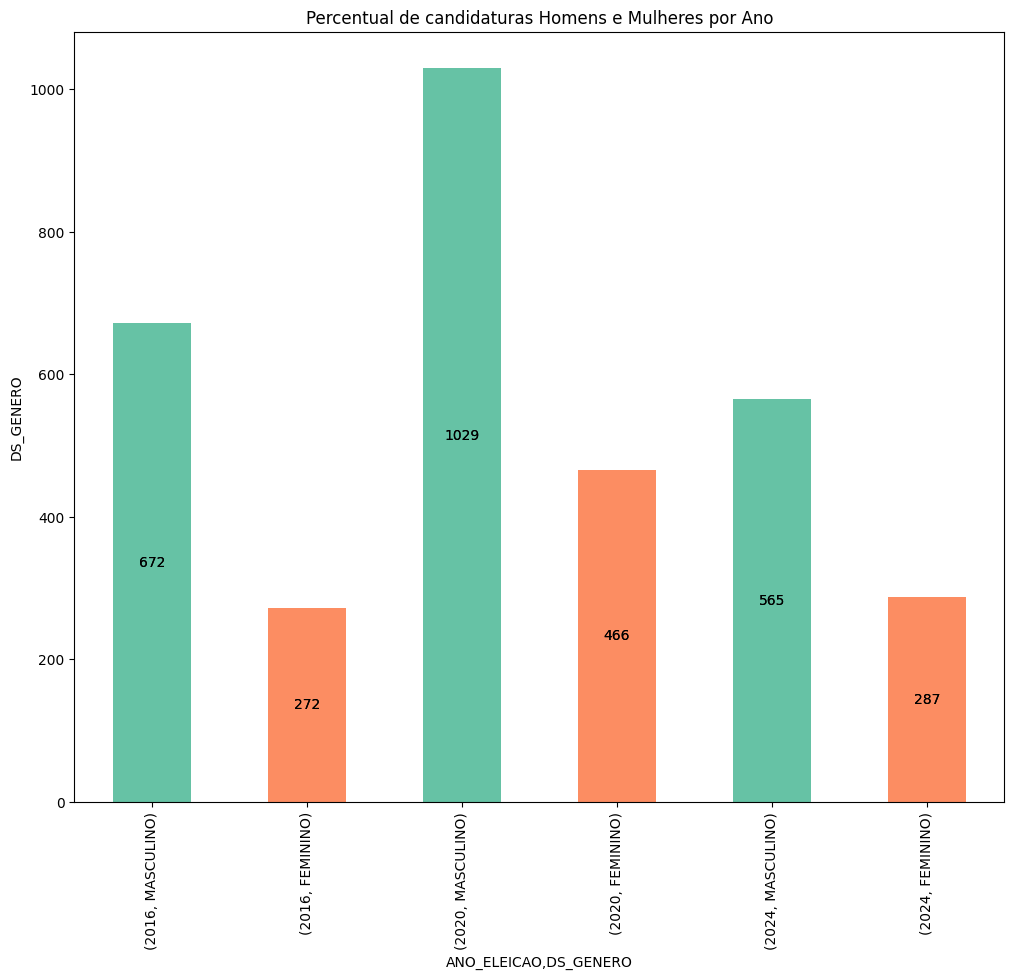

In [57]:
#Qual número de candidaturas de homens x mulheres
#Qual é o avanço da proporção homens x mulheres de 2016 - 2024?

#Percebemos que as candidaturas masculinas ainda são maioria nas 3 eleições analisadas.


qtdade_homens_mulheres = df_vereadores_total.groupby('ANO_ELEICAO')['DS_GENERO'].value_counts()
qtdade_homens_mulheres

cores = plt.cm.Set2([0, 1])

fig, ax = plt.subplots(figsize=(12, 10))

qtdade_homens_mulheres.plot(kind='bar', stacked=True, color = cores)
plt.title('Percentual de candidaturas Homens e Mulheres por Ano')
plt.xlabel('ANO_ELEICAO')
plt.ylabel('DS_GENERO')

ax = qtdade_homens_mulheres.plot(kind='bar', stacked=True, color=cores)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x+width/2, y+height/2), ha='center', va='center')

plt.show()


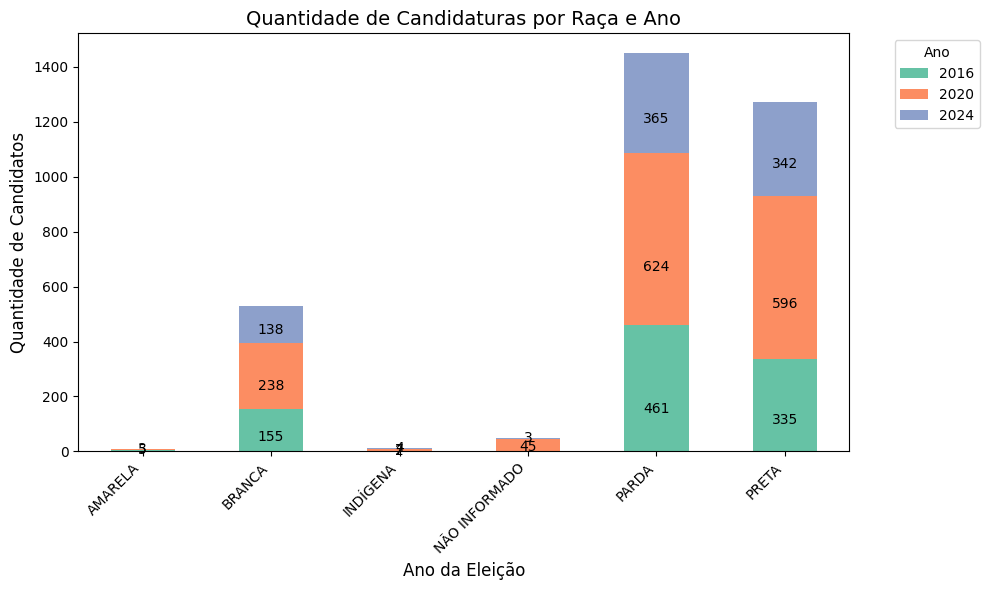

In [51]:
#Qual é a raça dos candidatos?

#Pretos e pardos possuem a maior parte do volume das candidaturas

qtadade_raca = df_vereadores_total.groupby(['DS_COR_RACA', 'ANO_ELEICAO']).size().unstack(fill_value=0)
cores = plt.cm.Set2(range(len(qtadade_raca)))
ax = qtadade_raca.plot(kind='bar', stacked=True, color=cores, figsize=(10, 6))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.annotate(f'{int(height)}', (x+width/2, y+height/3+2), ha='center', va='center', fontsize=10)

plt.title('Quantidade de Candidaturas por Raça e Ano', fontsize=14)
plt.xlabel('Ano da Eleição', fontsize=12)
plt.ylabel('Quantidade de Candidatos', fontsize=12)

plt.legend(title='Ano', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

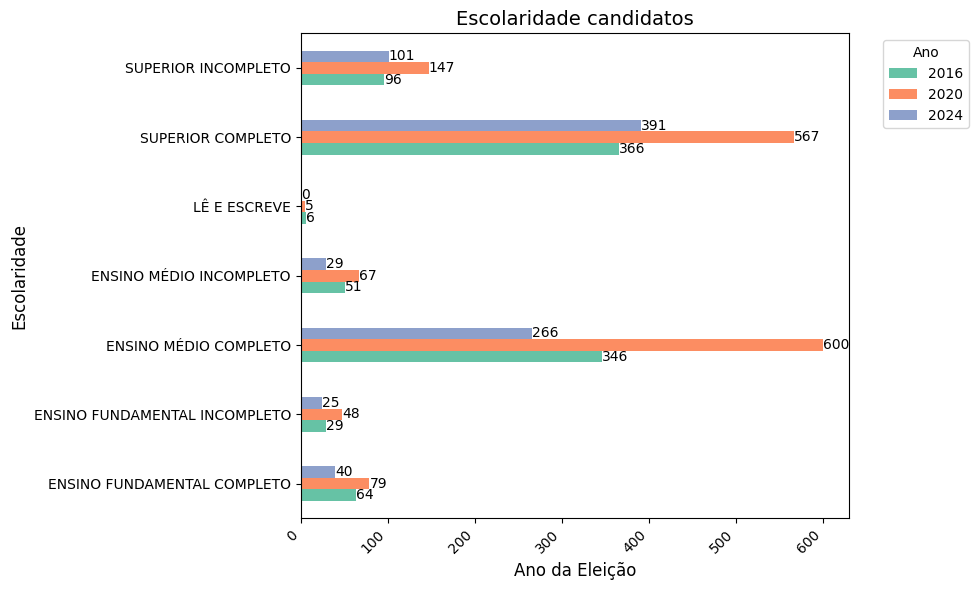

In [52]:
#qual é a escolaridade dos candidatos?

qtadade_escolaridade = df_vereadores_total.groupby('DS_GRAU_INSTRUCAO')['ANO_ELEICAO'].value_counts().unstack(fill_value=0)
cores = plt.cm.Set2(range(len(qtadade_escolaridade.columns)))
ax = qtadade_escolaridade.plot(kind='barh', color=cores, figsize=(10, 6))


for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.title('Escolaridade candidatos', fontsize=14)
plt.xlabel('Ano da Eleição', fontsize=12)
plt.ylabel('Escolaridade', fontsize=12)

plt.legend(title='Ano', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#Refinamento

In [53]:
df_vereadores_total = df_vereadores_total[df_vereadores_total['DS_CARGO']=='VEREADOR']

In [54]:
df_vereadores_total['DS_CARGO'].unique()

array(['VEREADOR'], dtype=object)

In [55]:
df_vereadores_total['NM_UE'].unique()

array(['SALVADOR'], dtype=object)

# Observações

- Foram encontrados 5 linhas repetidas na planilha 2024, esses valores foram excluídos da planilha
-94% dos eleitores não informaram raça, impossibilitando análises mais aprofundadas. ( [TSE,2024](https://sig.tse.jus.br/ords/dwapr/r/seai/sig-eleicao-eleitorado/painel-perfil-eleitorado?clear=17&session=3744905316104))
- Na coluna raça foram excluídos do Tableau 3 linhas em 2024 e 45 linhas em 2020, ambas com o campo "não informado"

# Exportação da base

In [56]:
df_vereadores_total.to_csv('base_vereadores_salvador.csv', index=False)